# Fraud Detection with Deep Learning

### Created by: Ameya Harshad Chaudhari

In this notebook, we'll explore the dataset, preprocess the data, and build a deep learning model to detect fraudulent transactions. Let's get started!

---

Installing required external Libraries

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 0 bytes ? 0:00:00
     - 10.2 kB ? 0:00:00
     \ 10.2 kB ? 0:00:00
     \ 10.2 kB ? 0:00:00
     | 10.2 kB ? 0:00:00
     | 10.2 kB ? 0:00:00
     / 10.2 kB ? 0:00:00
     / 10.2 kB ? 0:00:00
     - 10.2 kB ? 0:00:00
     - 10.2 kB ? 0:00:00
     \ 10.2 kB ? 0:00:00
     | 10.2 kB ? 0:00:00
     | 10.2 kB ? 0:00:00
     / 10.2 kB ? 0:00:00
     / 10.2 kB ? 0:00:00
     - 43.5 kB 50.8 kB/s 0:00:00
     - 43.5 kB 50.8 kB/s 0:00:00
     \ 43.5 kB 50.8 kB/s 0:00:00
     \ 43.5 kB 50.8 kB/s 0:00:00
     | 43.5 kB 50.8 kB/s 0:00:00
     | 43.5 kB 50.8 kB/s 0:00:00
     / 43.5 kB 50.8 kB/s 0:00:01
     - 53.8 kB 42.9 kB/s 0:00:01
     - 53.8 kB 42.9 kB/s 0:00:01
     \ 53.8 kB 42.9 kB/s 0:00:01
     \ 53.8 kB 42.9 kB/s 0:00:01
     | 53.8 kB 42.9 kB/s 0:00:01
     | 53.8 kB 42.9 kB/s 0:00:01
     / 53.8 kB 42.9 kB/s 0:00:01
     - 53.8 kB 42.9 kB/s 0:00:01
     - 53.8 kB 42.9 kB/s 0:00:01
     \ 53.8 kB 42.9 kB/s 0:00:01
     \ 64.0 kB 35.9 kB/s 0:00:01
     | 64.0 kB 35.9 kB/s 0:00:0

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 825, in read_chunked
    chunk = self._handle_chunk(amt)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 769, in _handle_chunk
    value = self._fp._safe_read(amt)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 109, in _safe_read
    data: bytes = self.__fp._safe_read(amt)  # type: ignore[attr-defined]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\http\client.py", line 631, in _safe_read
    data = self.fp.read(amt

Downloading the helper functions designed by mrdbourke which contains custom functions

In [2]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

'wget' is not recognized as an internal or external command,
operable program or batch file.


Importing required functions from helper functions

In [4]:
!pip install helper_functions

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [6]:
from helper_functions import plot_loss_curves, make_confusion_matrix

## Importing Libraries

To start, we'll import all the necessary libraries to process the data and build the model.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

## Data Loading

We'll load the dataset into a dataframe to explore its contents.

In [11]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Data Exploration

Before diving into modeling, it's essential to understand the structure, size, and distributions within the dataset.



Let's get a better understanding of our data's datatypes, size, and potential missing values.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Data Visualization

Visualizing the data can help in understanding its distribution and patterns. Here, we'll use histograms to visualize the distribution of each feature.

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >]],
      dtype=object)

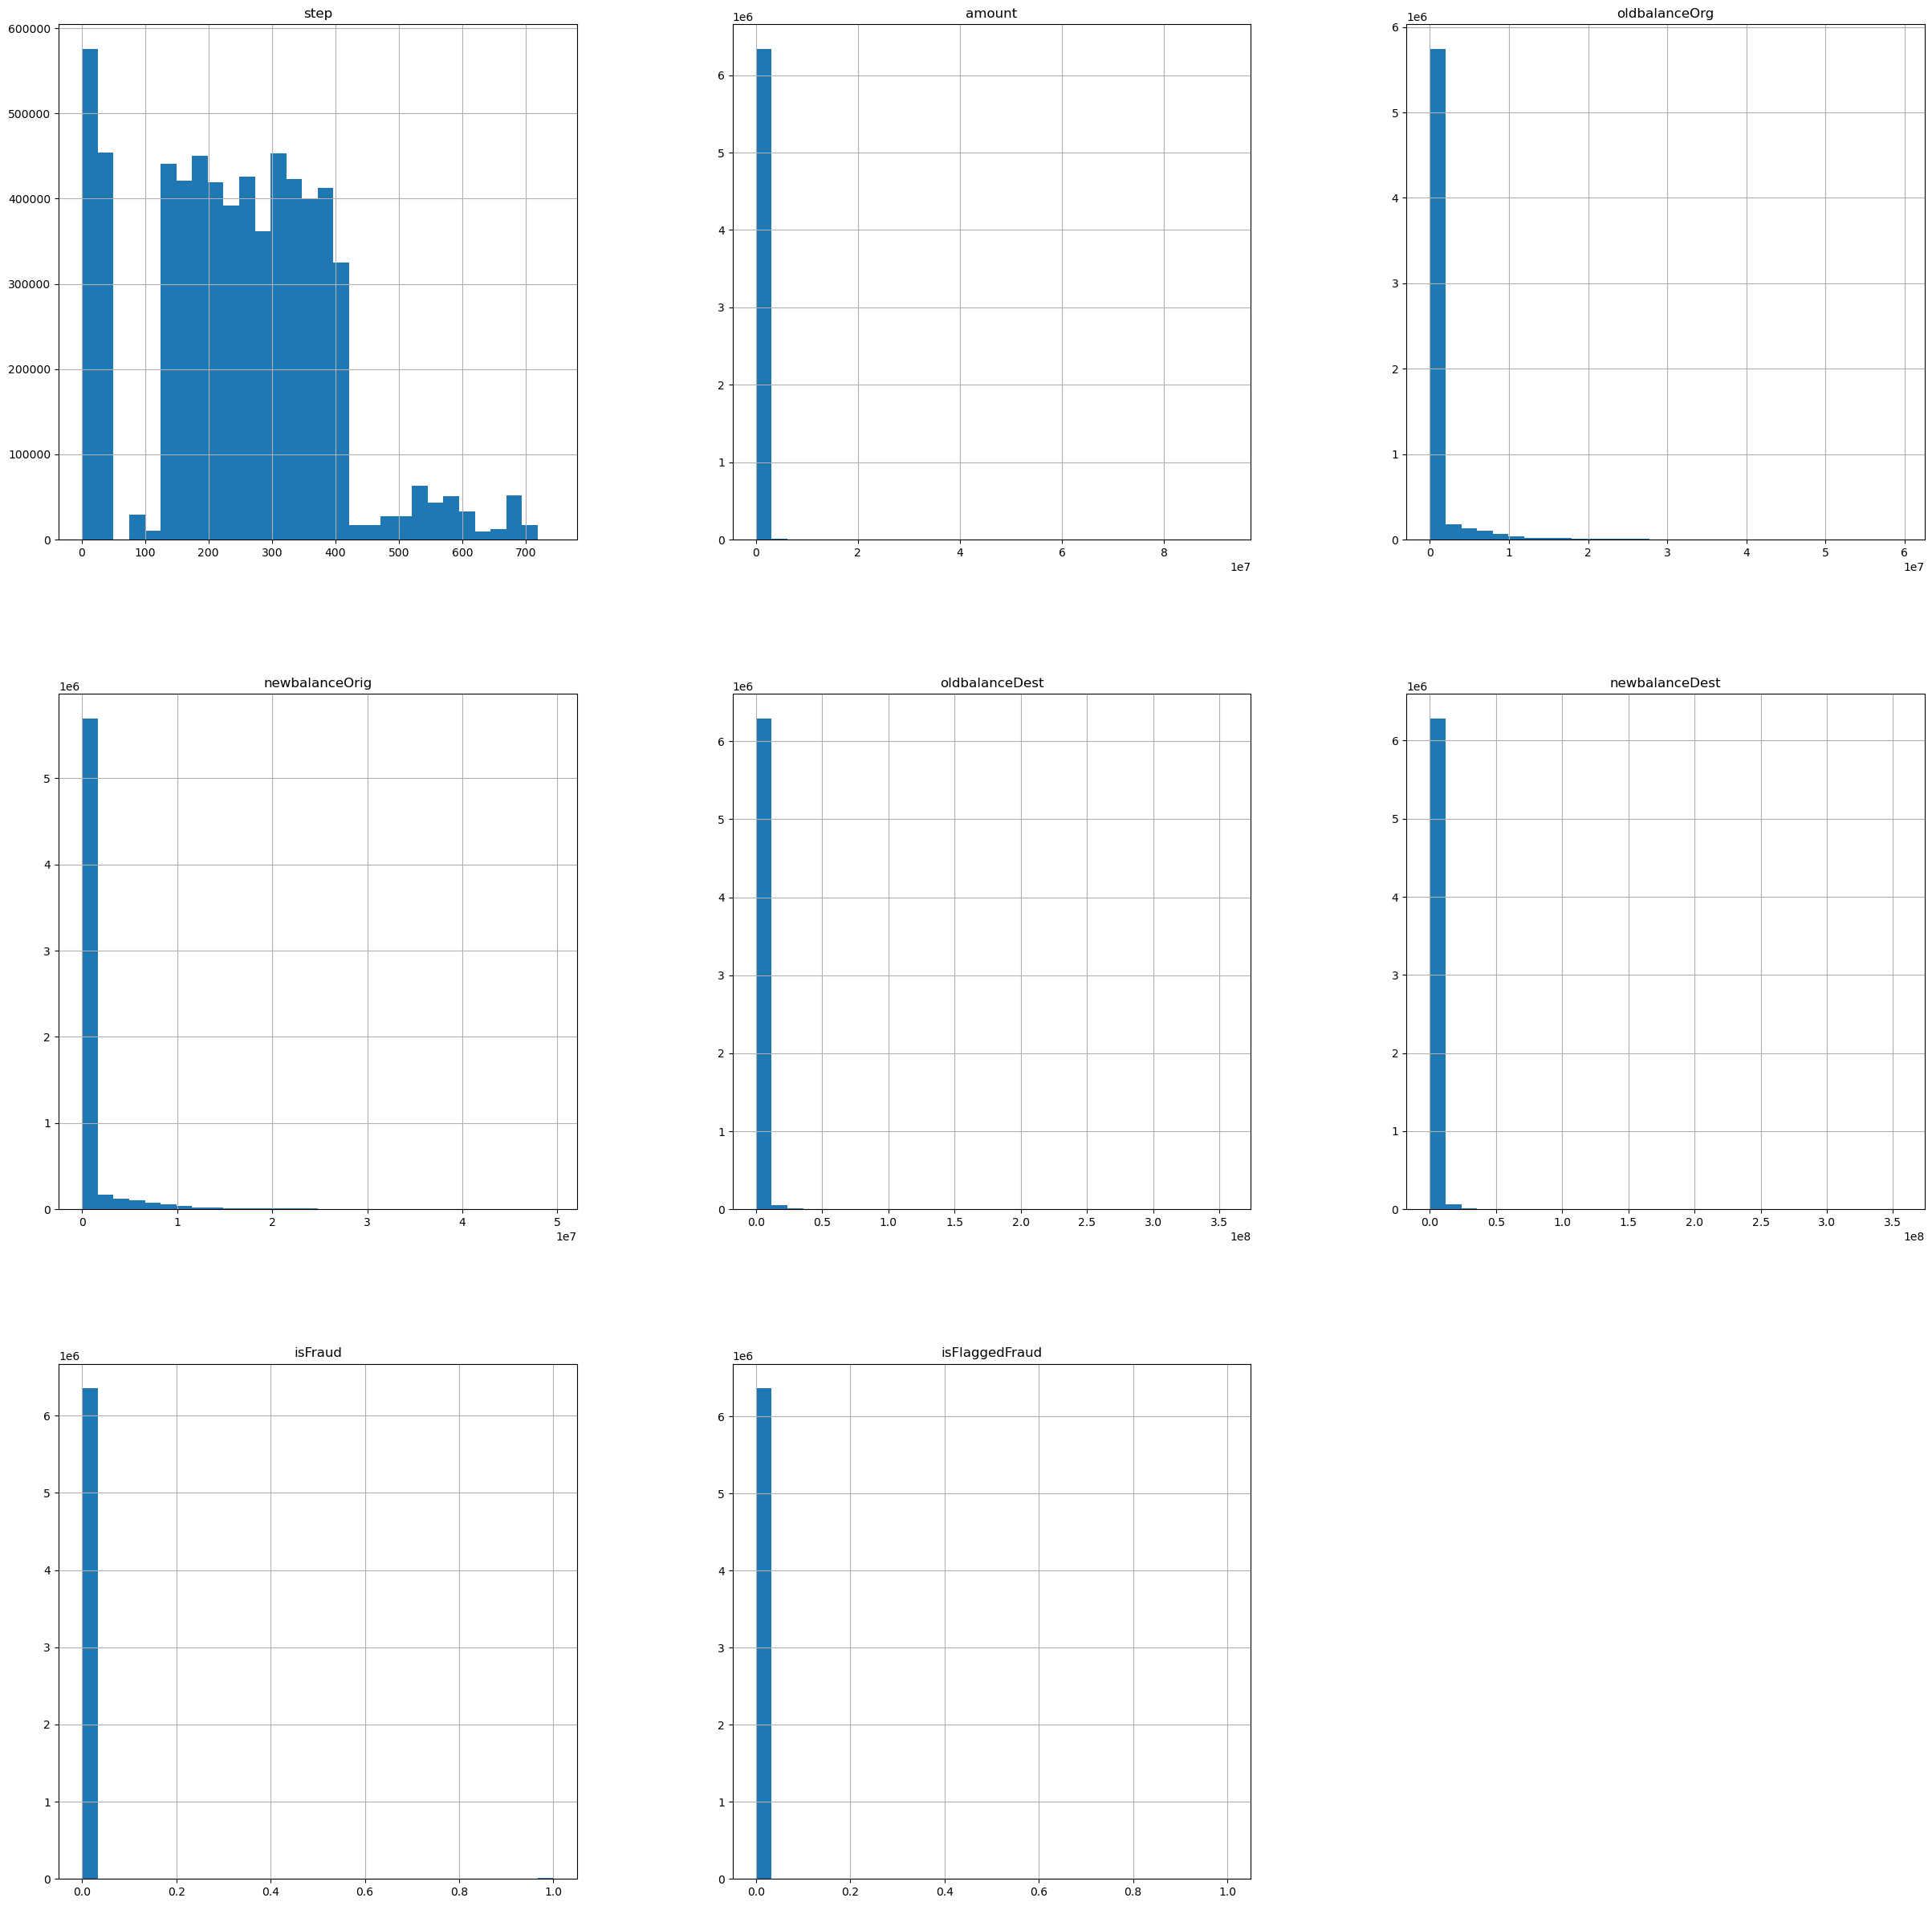

In [14]:
df.hist(bins = 30, figsize=(30,30))

In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Detailed Profiling using pandas_profiling

For a more in-depth exploration, we'll use the `pandas_profiling` library to generate a comprehensive report on the dataset.


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, explorative=True)
profile.to_notebook_iframe()

C:\Users\nithyalakshmim\AppData\Local\Temp\ipykernel_7332\1454031211.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

## 5. Data Preprocessing

With a good understanding of our dataset, we now move on to preprocessing. This includes scaling numerical features, encoding categorical variables, and handling any imbalances in our target variable.


> Multicollinearity Problem

When using deep neural networks, multicollinearity is less of a concern than it is for linear models. Neural networks, with their complex architectures and non-linear activation functions, can navigate through and even exploit the correlations between features. However, it's essential to monitor the training process and watch for overfitting, especially when using deep architectures.






Copying the main dataframe to another in form of backup

In [ ]:
df1 = df.copy()

First, we'll scale numeric features to ensure our model can process them efficiently. For this purpose, we'll use the `RobustScaler`specially to deal with the outilers.

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df1['amount'] = rs.fit_transform(df1['amount'].to_numpy().reshape(-1, 1))
df1['oldbalanceOrg'] = rs.fit_transform(df1['oldbalanceOrg'].to_numpy().reshape(-1, 1))
df1['newbalanceOrig'] = rs.fit_transform(df1['newbalanceOrig'].to_numpy().reshape(-1, 1))
df1['oldbalanceDest'] = rs.fit_transform(df1['oldbalanceDest'].to_numpy().reshape(-1, 1))
df1['newbalanceDest'] = rs.fit_transform(df1['newbalanceDest'].to_numpy().reshape(-1, 1))

Distribution after applying  `RobustScaler`






In [ ]:
df1.hist(bins = 30, figsize=(30,30))

End result

In [ ]:
df1.head()

Dropping unnecessary columns

In [ ]:
df1.drop(['nameOrig','nameDest','isFlaggedFraud'], axis = 1, inplace = True)

Applying one-hot encoding on categorical variable **type**

In [ ]:
df1 = pd.get_dummies(df1, columns = ['type'])

In [ ]:
df1.head()

Checking if data is imbalanced or not

In [ ]:
df1['isFraud'].value_counts()

## 6. Preparing Data for Modeling

Before training, we need to split our data and ensure it's in the right format. We'll also address **Isfraud** target variable imbalance using undersampling.

 Addressing `Isfraud ` imbalance using undersampling.

In [ ]:
not_frauds = df1.query('isFraud == 0')
frauds = df1.query('isFraud == 1')
not_frauds['isFraud'].value_counts(), frauds['isFraud'].value_counts()

Creating new dataframe which contains balanced classes

In [ ]:
under_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
under_df['isFraud'].value_counts()

Splitting undersampled data into independent and dependent features

In [ ]:
X = under_df.drop(['isFraud'], axis = 1)
y = under_df['isFraud']

Spliting the undersampled data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
y_train.value_counts()

Applying feature scaling `MinMaxScaler` on train and test data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
sc =  MinMaxScaler()

# Fit on the training data
X_train.iloc[:, :6] = sc.fit_transform(X_train.iloc[:, :6])

# Transform the validation/test data
X_test.iloc[:, :6] = sc.transform(X_test.iloc[:, :6])

## 7. Building the Deep Learning Model

Now that our data is ready, we'll construct a deep learning model using TensorFlow and Keras.

Deep Neural Network Architecture

In [ ]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
    layers.InputLayer(X_train.shape[1]),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation = 'sigmoid')

])


model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Fitting and training model on training set

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 20)

## 8. Model Evaluation

Post-training, we'll evaluate our model's performance using various metrics and visualizations.

In [ ]:
plot_loss_curves(history)

In [ ]:
y_prob = model.predict(X_test)
y_pred = tf.round(y_prob)

In [ ]:
make_confusion_matrix(y_test, y_pred)

### Detailed Classification Report

For a more granular understanding of our model's performance, we'll use the `classification_report` from scikit-learn. This report will provide key metrics like precision, recall, and F1-score for each class.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['Not Fraud','Fraud']))






> Conclusion



The model, trained using undersampling to address class imbalance, effectively detects fraudulent transactions using transaction amounts, balances, and types. With real-time processing and regular updates, it adapts to evolving fraud patterns. Its efficacy is monitored through false positives/negatives





 ## **Expected** questions to be answered

1. Data Cleaning including Missing Values, Outliers, and Multi-collinearity:

* **Missing Values**: The code used **df.isnull().sum()** to check for missing values in the dataset.

* **Outliers**: Outliers, especially in features like 'amount', were addressed by using the RobustScaler, which is less sensitive to outliers.

* **Multi-collinearity**: While the deep neural network model used can handle multicollinearity to some extent, it's always good to be aware of it. Deep learning models with their non-linear activation functions can navigate through and exploit correlations between features.

2. Describe your Fraud Detection Model in Elaboration:

* The model is a deep neural network built using TensorFlow and Keras. It has multiple dense layers, combined with dropout layers to prevent overfitting. The model uses the 'relu' activation function for internal layers and 'sigmoid' for the final layer, making it suitable for binary classification.

3. How did you Select Variables to be Included in the Model?

* Variables were selected based on their relevance to the target variable.
* Unnecessary columns like 'nameOrig', 'nameDest', and 'isFlaggedFraud' were dropped.
* The categorical 'type' column was one-hot encoded to be used in the model.

4. Demonstrate the Performance of the Model by using the Best Set of Tools:

* The model's performance was demonstrated using accuracy plots, confusion matrices, and a detailed classification report.
* These tools give a comprehensive view of the model's performance on both classes.

5. What are the Key Factors that Predict Fraudulent Customer?

* All available features after preprocessing (such as 'amount', 'oldbalanceOrg', etc., including the one-hot encoded 'type' features) are used by the model to predict fraud.

6. Do these Factors Make Sense? If yes, How? If not, How not?

* Yes, they do. Transaction amounts, old balances, and new balances can provide patterns typical of fraudulent activities. The type of transaction can also be indicative of fraud.
* For instance, certain types of transactions might be more prone to fraud than others.

7. What Kind of Prevention Should be Adopted while the Company Updates its Infrastructure?

* **Ensure data integrity**: As data is the backbone of this model, the infrastructure should prioritize data quality and integrity.

* **Real-time processing**: The infrastructure should be capable of real-time fraud detection to prevent fraudulent transactions promptly.

* **Regular model updates**: As fraud patterns evolve, the model should be retrained periodically with new data.
Implement multi-factor authentication and other security measures for transactions that the model flags as high risk.

8. Assuming these Actions have been Implemented, How Would You Determine if They Work?

* Monitor the false positive and false negative rates. An effective system should minimize both.
* Track the number of fraudulent transactions that go undetected versus those caught.
* Collect feedback from users. If genuine transactions are frequently flagged, it indicates a high false positive rate.
* Regularly evaluate the model's performance on new, unseen data to ensure it remains effective over time.

